In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
import nltk

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mjuna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mjuna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
true_df=pd.read_csv("true.csv")
fake_df=pd.read_csv("fake.csv")

In [8]:
true_df['label']=1
fake_df['label']=0

In [9]:
combined_df=pd.concat([true_df, fake_df],ignore_index=True)

In [10]:
combined_df=combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [11]:
print(combined_df)

                                                   title  \
0       BREAKING: GOP Chairman Grassley Has Had Enoug...   
1       Failed GOP Candidates Remembered In Hilarious...   
2       Mike Pence’s New DC Neighbors Are HILARIOUSLY...   
3      California AG pledges to defend birth control ...   
4      AZ RANCHERS Living On US-Mexico Border Destroy...   
...                                                  ...   
44893  Nigeria says U.S. agrees delayed $593 million ...   
44894                  Boiler Room #62 – Fatal Illusions   
44895  ATHEISTS SUE GOVERNOR OF TEXAS Over Display on...   
44896  Republican tax plan would deal financial hit t...   
44897  U.N. refugee commissioner says Australia must ...   

                                                    text          subject  \
0      Donald Trump s White House is in chaos, and th...             News   
1      Now that Donald Trump is the presumptive GOP n...             News   
2      Mike Pence is a huge homophobe. He suppor

In [12]:
import re
stop_words= set(stopwords.words('english'))

In [13]:
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    words = word_tokenize(text)
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    # Join words back into a single string
    return ' '.join(words)

In [14]:
# Apply the cleaning function to the 'text' column
combined_df['cleaned_text'] = combined_df['text'].apply(clean_text)

# Display the first few rows of the cleaned data
print(combined_df[['text', 'cleaned_text', 'label']].head())

                                                text  \
0  Donald Trump s White House is in chaos, and th...   
1  Now that Donald Trump is the presumptive GOP n...   
2  Mike Pence is a huge homophobe. He supports ex...   
3  SAN FRANCISCO (Reuters) - California Attorney ...   
4  Twisted reasoning is all that comes from Pelos...   

                                        cleaned_text  label  
0  donald trump white house chaos trying cover ru...      0  
1  donald trump presumptive gop nominee time reme...      0  
2  mike pence huge homophobe supports exgay conve...      0  
3  san francisco reuters california attorney gene...      1  
4  twisted reasoning comes pelosi days especially...      0  


In [15]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features for efficiency

# Fit and transform the cleaned text data
X = tfidf_vectorizer.fit_transform(combined_df['cleaned_text']).toarray()

# Extract labels
y = combined_df['label'].values

# Check the shape of the feature matrix and labels
print("Feature matrix shape:", X.shape)
print("Labels shape:", y.shape)

Feature matrix shape: (44898, 5000)
Labels shape: (44898,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4669
           1       0.98      0.99      0.99      4311

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Confusion Matrix:
[[4603   66]
 [  38 4273]]


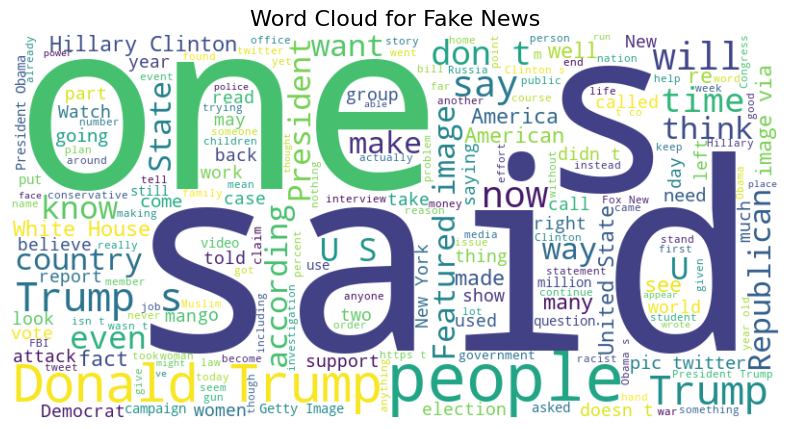

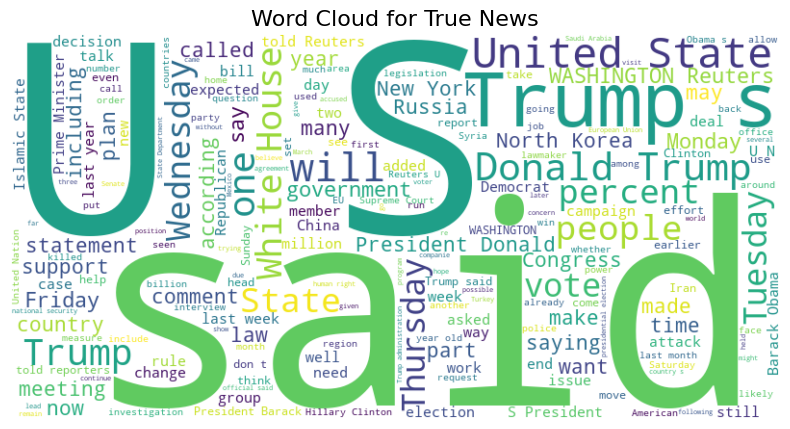

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(data, title):
    text = " ".join(data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis("off")
    plt.show()

plot_wordcloud(fake_df['text'], "Word Cloud for Fake News")
plot_wordcloud(true_df['text'], "Word Cloud for True News")


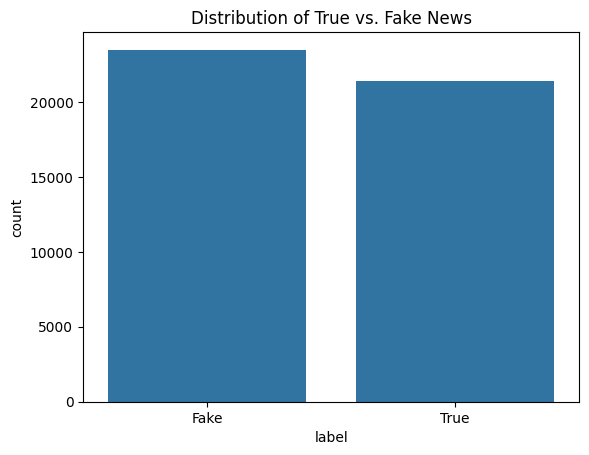

In [19]:
import seaborn as sns

sns.countplot(x="label", data=pd.concat([true_df, fake_df]))
plt.title("Distribution of True vs. Fake News")
plt.xticks([0, 1], ['Fake', 'True'])
plt.show()


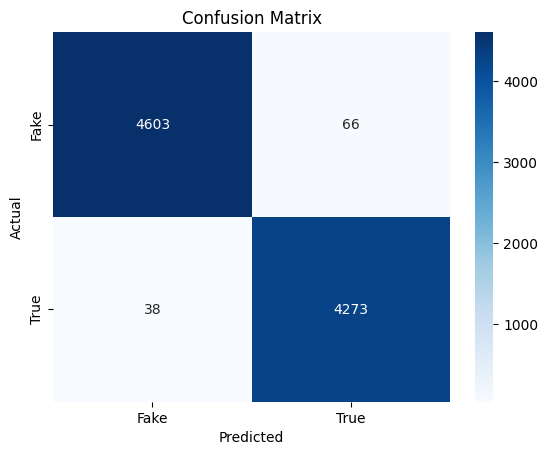

In [20]:
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [21]:
print("Number of True News Articles:", true_df.shape[0])
print("Number of Fake News Articles:", fake_df.shape[0])


Number of True News Articles: 21417
Number of Fake News Articles: 23481


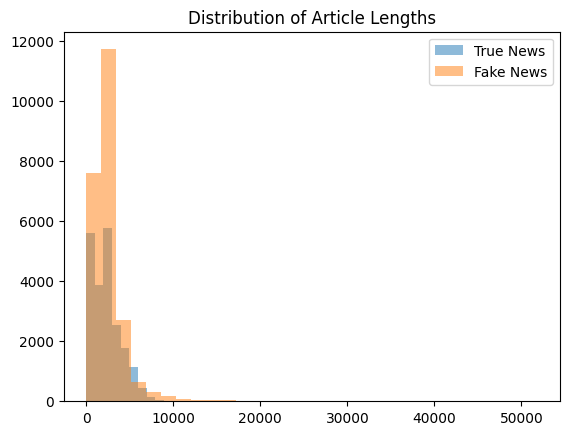

In [22]:
true_df['text_length'] = true_df['text'].apply(len)
fake_df['text_length'] = fake_df['text'].apply(len)

plt.hist(true_df['text_length'], bins=30, alpha=0.5, label='True News')
plt.hist(fake_df['text_length'], bins=30, alpha=0.5, label='Fake News')
plt.legend()
plt.title("Distribution of Article Lengths")
plt.show()
